A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

 

Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Load the data and understand the data


In [1718]:
import pandas as pd 
house_df = pd.read_csv("train.csv")

In [1719]:
#Checking the info of the data frame
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Observation
There are 81 columns with 1460 records some of the columns have null values. They shall be addressed individually below.


In [1720]:
# The statistical data is observed here
house_df.describe(include ='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


#### Correcting Data

#### Columnn MSSubClass

In [1721]:
#This data has o be replaced according to the data dictionary
house_df.MSSubClass.head()

0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [1722]:
#Dictionary holding the values and theor meanings this is used below to replace
MSSubClass_dict = {20:"1-STORY 1946 & NEWER ALL STYLES",
                  30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:"1-1/2 STORY PUD - ALL AGES",
       160:"2-STORY PUD - 1946 & NEWER",
       180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}
house_df.MSSubClass = house_df.MSSubClass.apply(lambda x: MSSubClass_dict[x])
#After replacing the values according to the data dictionary
house_df.MSSubClass.head()        

0               2-STORY 1946 & NEWER
1    1-STORY 1946 & NEWER ALL STYLES
2               2-STORY 1946 & NEWER
3               2-STORY 1945 & OLDER
4               2-STORY 1946 & NEWER
Name: MSSubClass, dtype: object

#### Columnn OverallQual

In [1723]:
#This data has o be replaced according to the data dictionary
house_df.OverallQual.head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

In [1724]:
#Dictionary holding the values and theor meanings this is used below to replace
OverallQual_dict = {10: "Very Excellent",
       9: "Excellent",
       8: "Very Good",
       7: "Good",
       6: "Above Average",
       5: "Average",
       4: "Below Average",
       3: "Fair",
       2: "Poor",
       1: "Very Poor"
    }
house_df.OverallQual = house_df.OverallQual.apply(lambda x: OverallQual_dict[x])

In [1725]:
#After replacing the values according to the data dictionary
house_df.OverallQual.head()

0             Good
1    Above Average
2             Good
3             Good
4        Very Good
Name: OverallQual, dtype: object

#### Columnn OverallCond

In [1726]:
#This data has o be replaced according to the data dictionary
house_df.OverallCond.head()

0    5
1    8
2    5
3    5
4    5
Name: OverallCond, dtype: int64

In [1727]:
#Dictionary holding the values and theor meanings this is used below to replace
OverallCond_dict = {10: "Very Excellent",
       9: "Excellent",
       8: "Very Good",
       7: "Good",
       6: "Above Average",
       5: "Average",
       4: "Below Average",
       3: "Fair",
       2: "Poor",
       1: "Very Poor"
    }
house_df.OverallCond = house_df.OverallCond.apply(lambda x: OverallCond_dict[x])

In [1728]:
#After replacing the values according to the data dictionary
house_df.OverallCond.head()

0      Average
1    Very Good
2      Average
3      Average
4      Average
Name: OverallCond, dtype: object

In [1729]:
#Finding columns with null values to fix them first
#this line gets all columns with more thamn 0 null values
null_columns = house_df.columns[house_df.isnull().sum()>0]
#this line shows how many null values are present as percent
round(house_df[null_columns].isnull().sum()/len(house_df)*100,2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [1730]:
#dropping the columns with more than 45% null values
house_df = house_df.drop(["Alley", "FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [1731]:
#Checking for null values again
#this line gets all columns with more thamn 0 null values
null_columns2 = house_df.columns[house_df.isnull().sum()>0]
#this line shows how many null values are present as percent
house_df[null_columns2].isnull().sum()


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [1732]:
#helper function to replace numerical values with median
def fun_num_replace(col_name):
    print("*"*50)
    #Display the count of null values
    print("Displaying the count of null values before replacing: ",house_df[col_name].isnull().sum())
    print("*"*50)
    print("Statistical data of the col:  {} \n{}".format(col_name, house_df[col_name].describe()))
    #replacing the column with median
    print("*"*50)
    print("Replacing the null values with median of value",house_df[col_name].median())
    #replacing the LotFrontage with median
    house_df[col_name].fillna(house_df[col_name].median(), inplace=True)
    print("*"*50)
    #Rechecking if it replaced correctly
    print("Updated Count of Null values: ",house_df[col_name].isnull().sum())
    print("*"*50)
    print(house_df[col_name].describe())
    

In [1733]:
#helper function to replace categorical values with mode
def fun_cat_replace(col_name):
    print("*"*50)
    #Display the count of null values
    print("Displaying the count of null values before replacing: ",house_df[col_name].isnull().sum())
    print("*"*50)
    print("Statistical data of the col:  {} \n{}".format(col_name, house_df[col_name].describe()))
    #replacing the column with median
    print("*"*50)
    print("Replacing the null values with mode of value",house_df[col_name].mode()[0])
    #replacing the LotFrontage with mode
    house_df[col_name].fillna(house_df[col_name].mode()[0], inplace=True)
    print("*"*50)
    #Rechecking if it replaced correctly
    print("Updated Count of Null values: ",house_df[col_name].isnull().sum())
    print("*"*50)
    print(house_df[col_name].describe())
    

In [1734]:
# Listing all numerical columns that need to be addressed for null values
print("These are numerical columns which have null values and they are going to be addressed here using helper functions")
num_col_list = list(house_df[null_columns2].select_dtypes(exclude=object).columns)
print(num_col_list)
print("-"*50)
for num_col in num_col_list:
    print("Calling helper function for the columns: ", num_col)
    fun_num_replace(num_col)

These are numerical columns which have null values and they are going to be addressed here using helper functions
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
--------------------------------------------------
Calling helper function for the columns:  LotFrontage
**************************************************
Displaying the count of null values before replacing:  259
**************************************************
Statistical data of the col:  LotFrontage 
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
**************************************************
Replacing the null values with median of value 69.0
**************************************************
Updated Count of Null values:  0
**************************************************
count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%     

In [1735]:
# Listing all categorical columns that need to be addressed for null values
print("These are categorical columns which have null values and they are going to be addressed here using helper functions")
cat_col_list = list(house_df[null_columns2].select_dtypes(include=object).columns)
print(cat_col_list)
print("-"*50)
for cat_col in cat_col_list:
    print("Calling helper function for the columns: ", cat_col)
    fun_cat_replace(cat_col)

These are categorical columns which have null values and they are going to be addressed here using helper functions
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
--------------------------------------------------
Calling helper function for the columns:  MasVnrType
**************************************************
Displaying the count of null values before replacing:  8
**************************************************
Statistical data of the col:  MasVnrType 
count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
**************************************************
Replacing the null values with mode of value None
**************************************************
Updated Count of Null values:  0
**************************************************
count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object


In [1736]:
#Checking for the whole data frame if ther are still any null values
house_df.columns[house_df.isnull().sum()>0]

Index([], dtype='object')

In [1737]:
#dropping the Id column as it is not adding value to the EDA
house_df.drop("Id",axis=1,inplace=True)

### Univariate Analysis

#####  Numerical Columns

In [1738]:
numerical_cols = list(house_df.select_dtypes(exclude =object).columns)

print("These are the numerical columns box plot will be drawn for each to analyse them", numerical_cols)
len(numerical_cols)

These are the numerical columns box plot will be drawn for each to analyse them ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


34

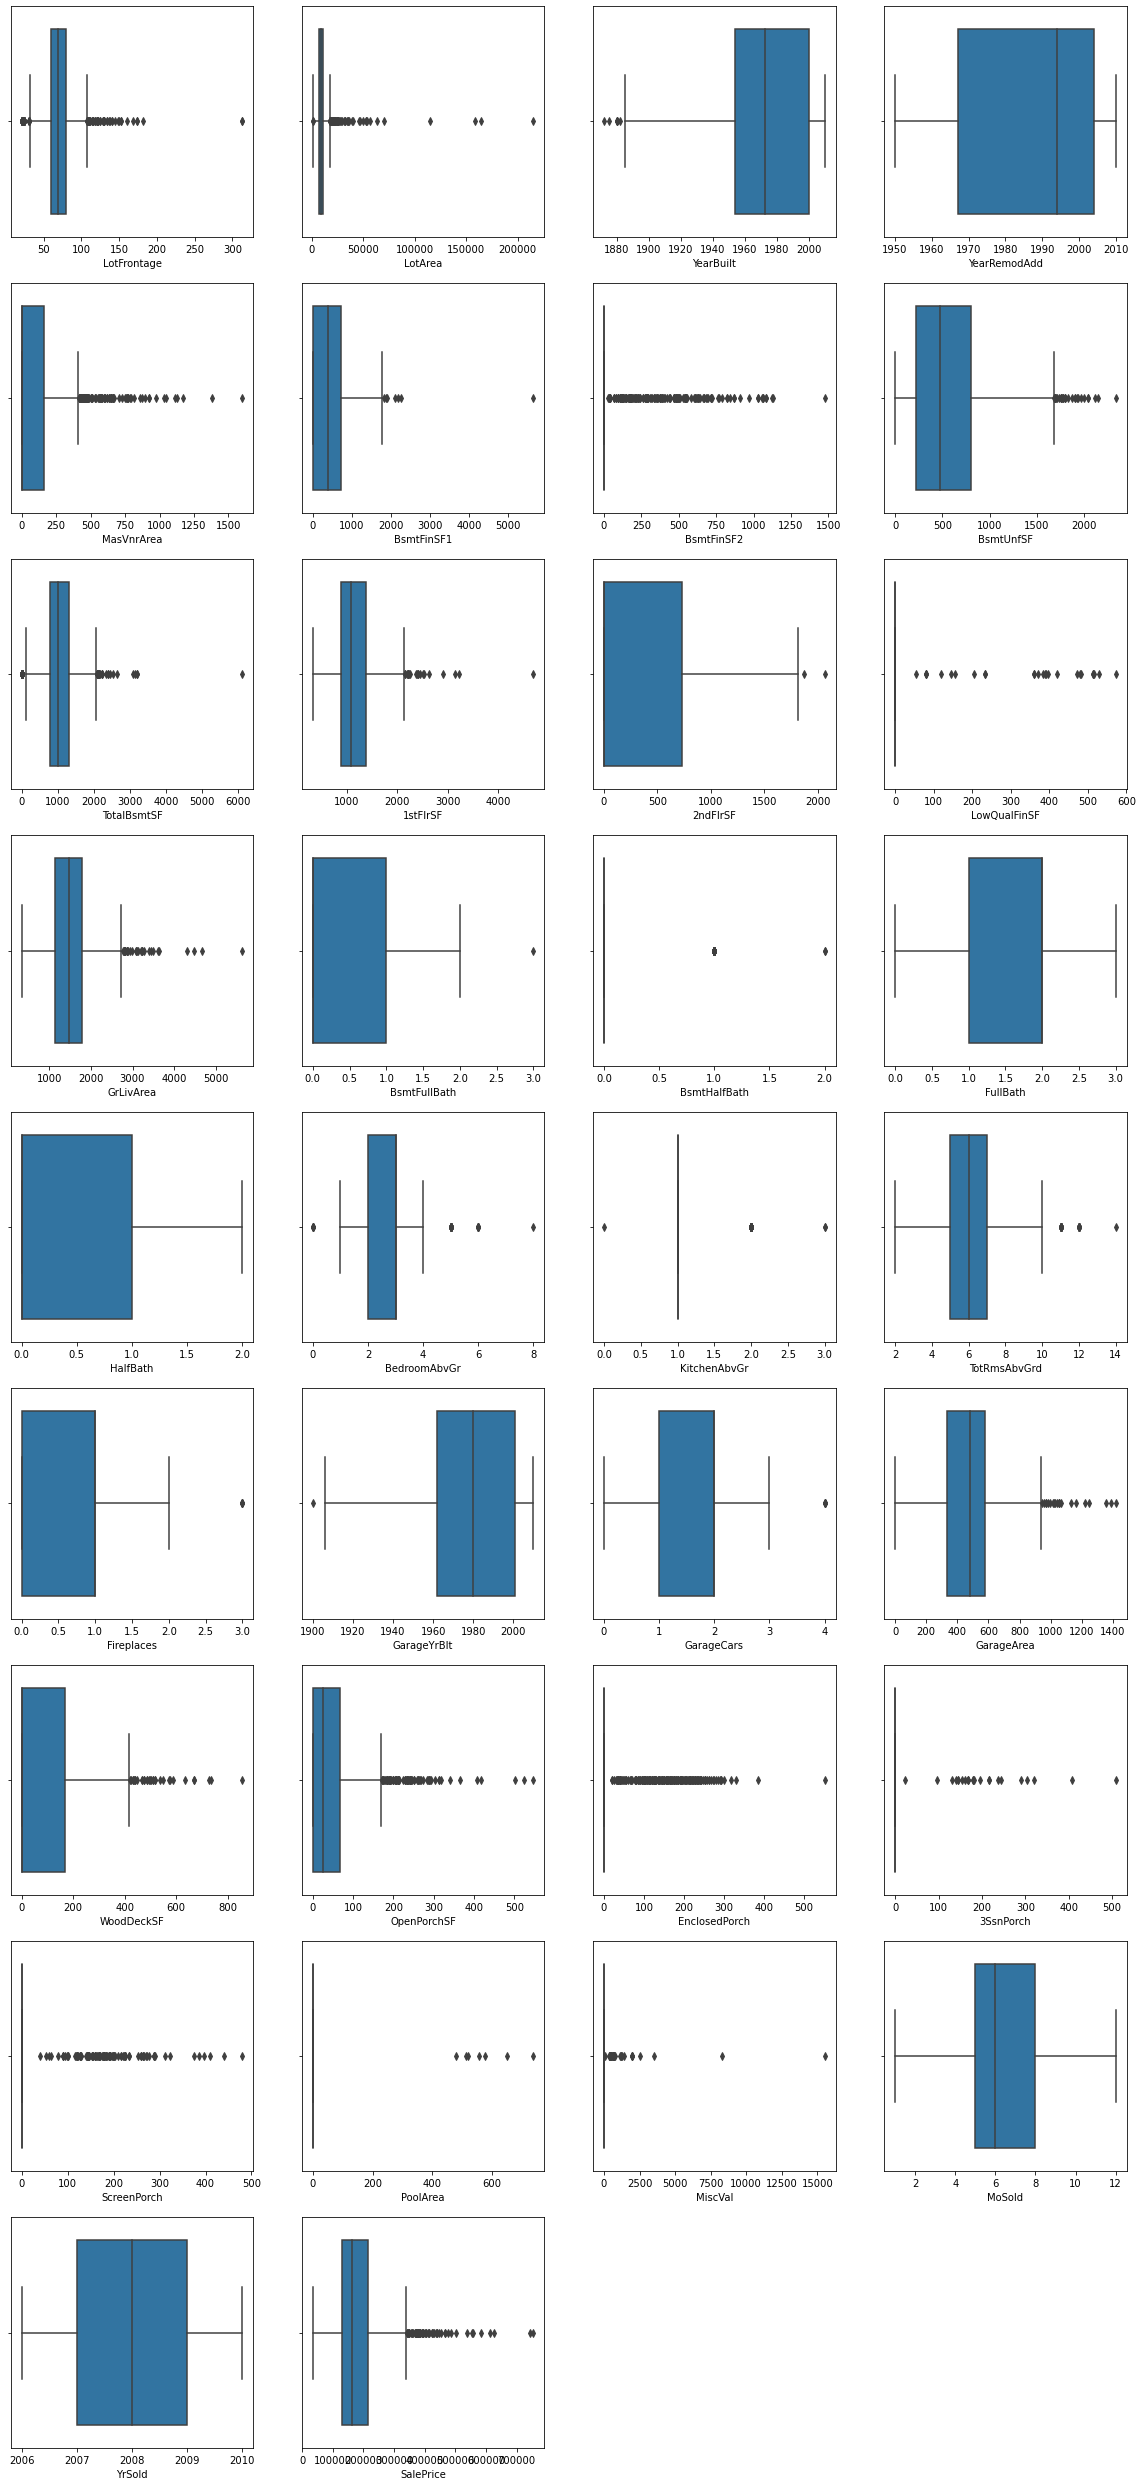

In [1739]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,50))
for i,val in enumerate(numerical_cols):
#     plt.title(val)
    plt.subplot(10,4,i+1)
    sns.boxplot(house_df[val])
    

In [1647]:
# sns.pairplot(data = house_df)

In [1740]:
#helper function to treat the outliers the values thare greater than 1.5*IQR and less than 1.5*IQR are removed
def func_outlier_treatment(col,house_df):
    Q3 = house_df[col].quantile(.75)
    Q1 = house_df[col].quantile(.25)
    IQR = Q3 - Q1
    print("Q1,Q3,IQR",Q1,Q3,IQR)
    house_df = house_df[~(house_df[col]<(Q1-1.5*IQR)) & ~(house_df[col]>(Q3+1.5*IQR))]
    return house_df

In [1741]:
#Looking at one column at a time
# starting with columns that have very startling outliers


### Column LotArea

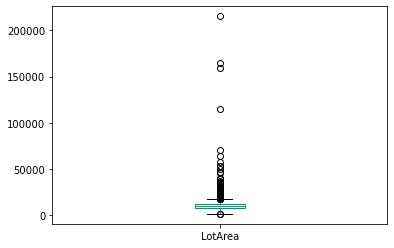

In [1742]:
house_df["LotArea"].plot.box()

Q1,Q3,IQR 7553.5 11601.5 4048.0


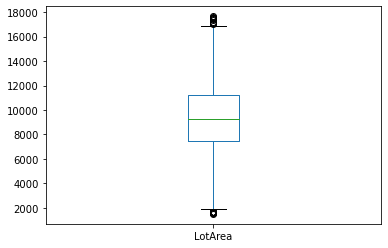

In [1743]:
#outlier treatment
house_df = func_outlier_treatment("LotArea",house_df)
house_df["LotArea"].plot.box()

In [1744]:
#Rechecking 
house_df["LotArea"].describe()

count     1391.000000
mean      9272.537024
std       3196.732418
min       1491.000000
25%       7429.000000
50%       9286.000000
75%      11231.500000
max      17671.000000
Name: LotArea, dtype: float64

###  Column LotFrontage

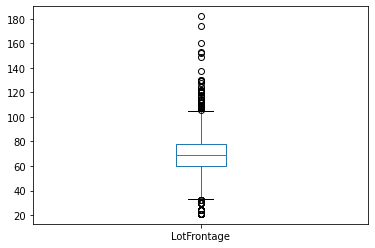

In [1745]:
house_df["LotFrontage"].plot.box()

Q1,Q3,IQR 60.0 78.0 18.0


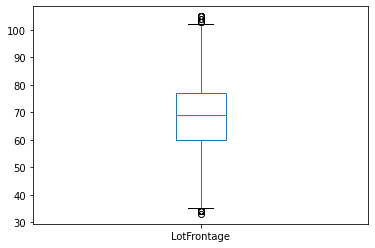

In [1746]:
#outlier treatment
house_df = func_outlier_treatment("LotFrontage",house_df)
house_df["LotFrontage"].plot.box()

###  Column BsmtFinSF1

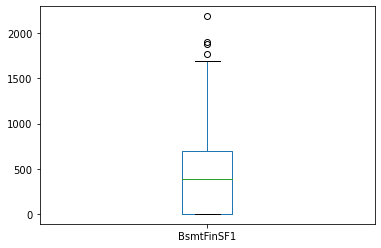

In [1747]:
house_df.BsmtFinSF1.plot.box()

Q1,Q3,IQR 0.0 699.75 699.75


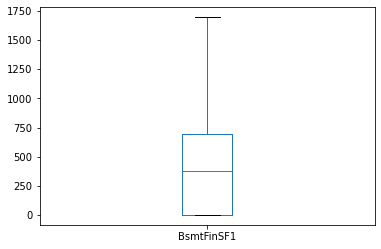

In [1748]:
#outlier treatment
house_df = func_outlier_treatment("BsmtFinSF1",house_df)
house_df["BsmtFinSF1"].plot.box()

In [1749]:
house_df.BsmtFinSF1.describe()

count    1286.000000
mean      425.185848
std       412.716242
min         0.000000
25%         0.000000
50%       381.000000
75%       697.000000
max      1696.000000
Name: BsmtFinSF1, dtype: float64

###  Column BsmtFinSF2

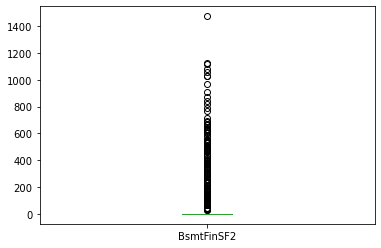

In [1750]:
house_df.BsmtFinSF2.plot.box()

In [1751]:
house_df.BsmtFinSF2.describe()

count    1286.000000
mean       42.748834
std       151.259202
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [1752]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("BsmtFinSF2",axis=1,inplace=True)
numerical_cols.remove("BsmtFinSF2")

###  Column TotalBsmtSF

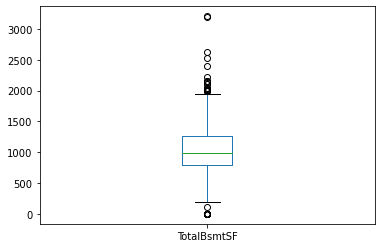

In [1753]:
house_df.TotalBsmtSF.plot.box()

Q1,Q3,IQR 799.25 1260.75 461.5


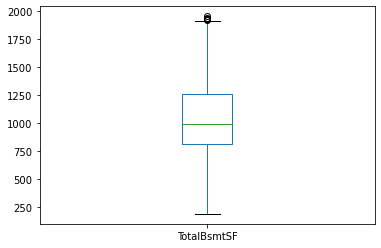

In [1754]:
#outlier treatment
house_df = func_outlier_treatment("TotalBsmtSF",house_df)
house_df["TotalBsmtSF"].plot.box()

In [1755]:
house_df.TotalBsmtSF.describe()

count    1230.000000
mean     1049.855285
std       327.230487
min       190.000000
25%       816.000000
50%       992.000000
75%      1256.750000
max      1952.000000
Name: TotalBsmtSF, dtype: float64

###  Column LowQualFinSF

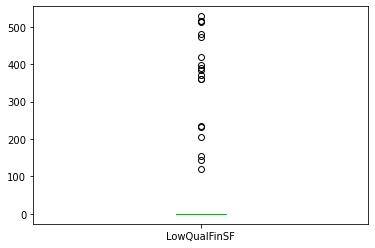

In [1756]:
house_df.LowQualFinSF.plot.box()

In [1757]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("LowQualFinSF",axis=1,inplace=True)
numerical_cols.remove("LowQualFinSF")

###  Column BsmtHalfBath

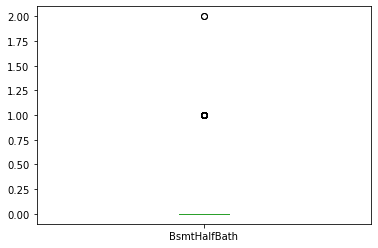

In [1758]:
house_df.BsmtHalfBath.plot.box()

In [1759]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("BsmtHalfBath",axis=1,inplace=True)
numerical_cols.remove("BsmtHalfBath")

###  Column KitchenAbvGr

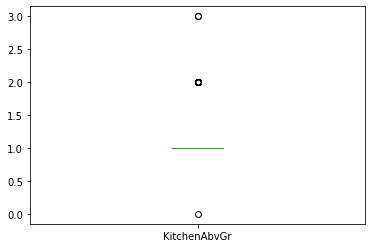

In [1760]:
house_df.KitchenAbvGr.plot.box()

In [1761]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("KitchenAbvGr",axis=1,inplace=True)
numerical_cols.remove("KitchenAbvGr")

###  Column EnclosedPorch

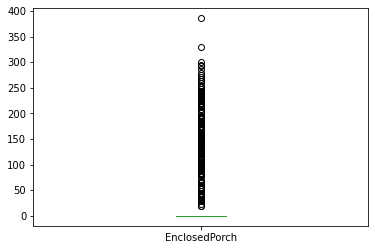

In [1762]:
house_df.EnclosedPorch.plot.box()

In [1763]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("EnclosedPorch",axis=1,inplace=True)
numerical_cols.remove("EnclosedPorch")

###  Column 3SsnPorch

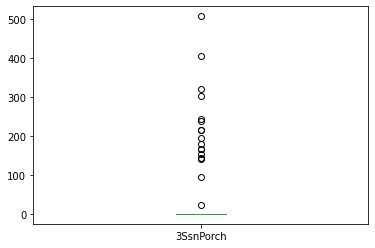

In [1764]:
house_df["3SsnPorch"].plot.box()

In [1765]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("3SsnPorch",axis=1,inplace=True)
numerical_cols.remove("3SsnPorch")

###  Column ScreenPorch

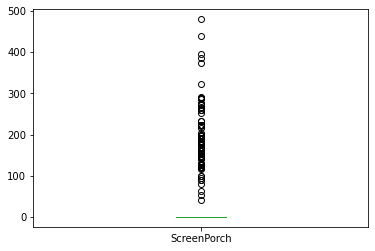

In [1766]:
house_df.ScreenPorch.plot.box()

In [1767]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("ScreenPorch",axis=1,inplace=True)
numerical_cols.remove("ScreenPorch")

###  Column PoolArea

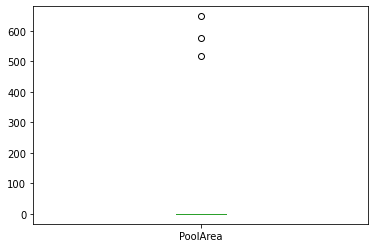

In [1768]:
house_df.PoolArea.plot.box()

In [1769]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("PoolArea",axis=1,inplace=True)
numerical_cols.remove("PoolArea")

###  Column MasVnrArea

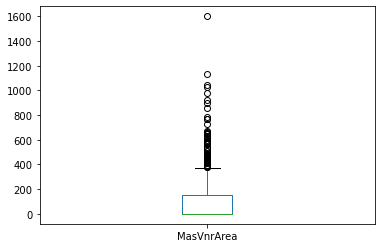

In [1770]:
house_df.MasVnrArea.plot.box()

Q1,Q3,IQR 0.0 150.5 150.5


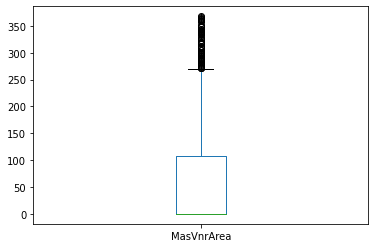

In [1771]:
#outlier treatment
house_df = func_outlier_treatment("MasVnrArea",house_df)
house_df["MasVnrArea"].plot.box()

In [1772]:
house_df.MasVnrArea.describe()

count    1157.000000
mean       62.657736
std       100.609477
min         0.000000
25%         0.000000
50%         0.000000
75%       108.000000
max       368.000000
Name: MasVnrArea, dtype: float64

###  Column MiscVal

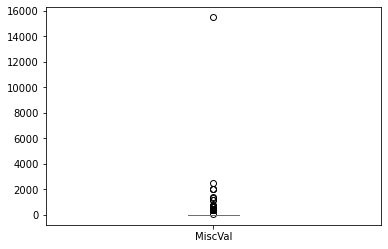

In [1773]:
house_df.MiscVal.plot.box()

In [1774]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
house_df.drop("MiscVal",axis=1,inplace=True)
numerical_cols.remove("MiscVal")

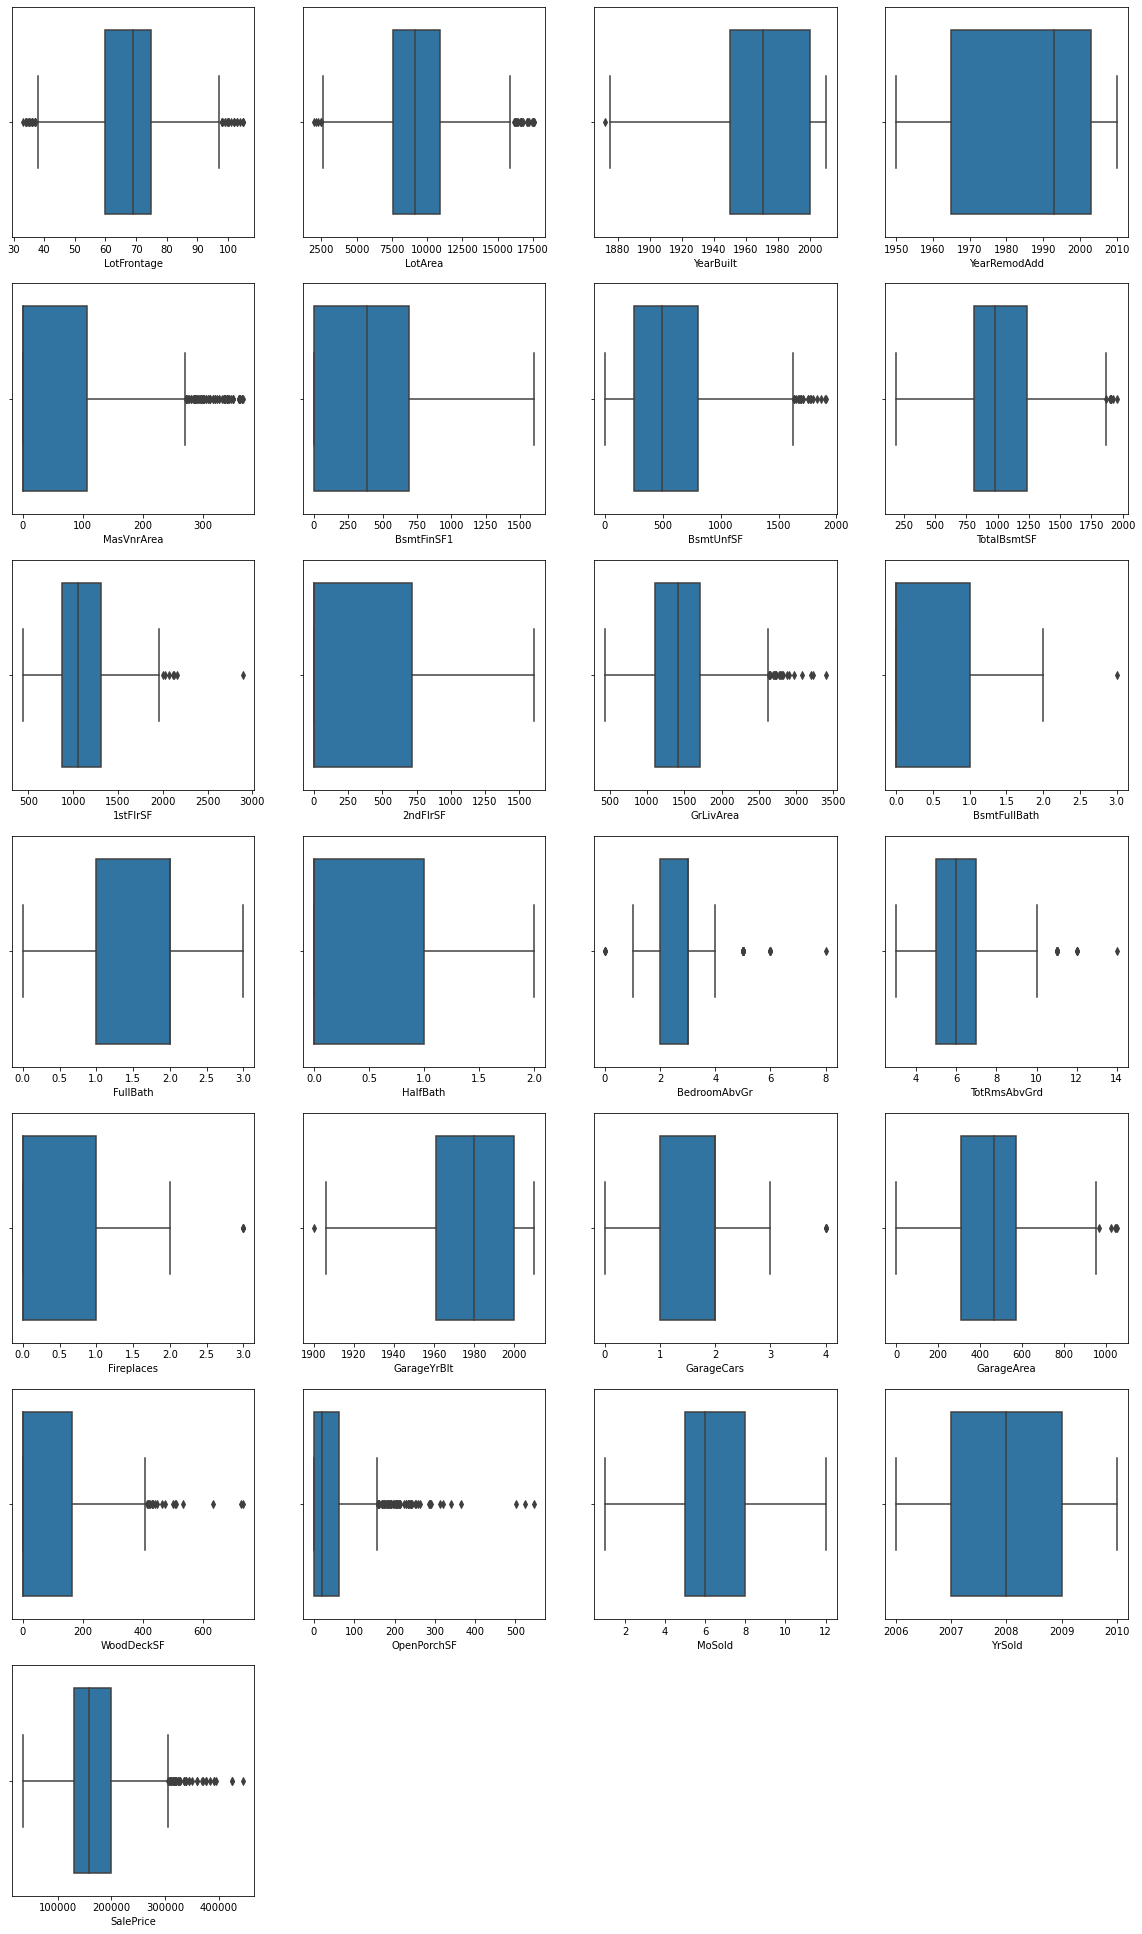

In [1775]:
#Rechecking the box plot for outliers
plt.figure(figsize=(20,50))
for i,val in enumerate(numerical_cols):
    plt.subplot(10,4,i+1)
    sns.boxplot(house_df[val])

In [1684]:
sns.pairplot(house_df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021E9E5CDD30> (for post_execute):


KeyboardInterrupt: 

#### Correlation among numerical cols

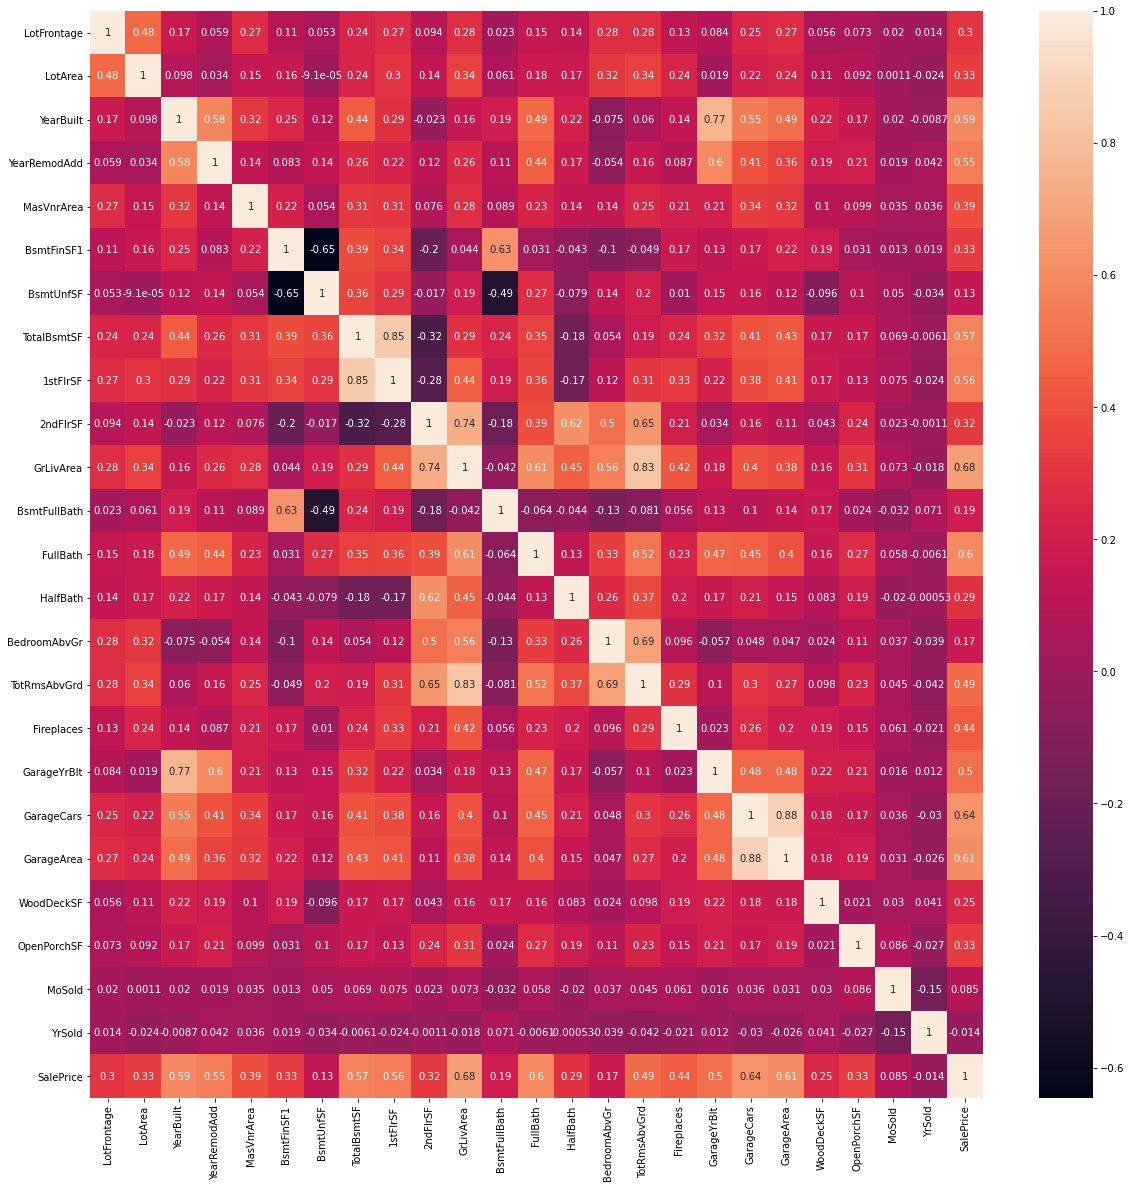

In [1776]:
# Checking for correlated columns
plt.figure(figsize =(20,20))
sns.heatmap(house_df[numerical_cols].corr(),annot =True);

* The column GarageYrBlt has high correlation with YearBuilt and GarageArea have high correlation
* The column TotRmsAbvGrd is highly correlated with GrLivArea, BedroomAbvGr
* The column GrLivArea is correlated with 2ndFlrSF
* The column TotalBsmtSF and 1stFlrSF are correlated
* GarageArea and GargeCars are correlated

In [1777]:
#Dropping the highly correlated columns
house_df.drop(["GarageYrBlt","TotRmsAbvGrd","2ndFlrSF","TotalBsmtSF","GarageCars"],axis=1,inplace=True)

In [1778]:
#Updating the numerical columns 
numerical_cols.remove("GarageYrBlt")
numerical_cols.remove("TotRmsAbvGrd")
numerical_cols.remove("2ndFlrSF")
numerical_cols.remove("TotalBsmtSF")
numerical_cols.remove("GarageCars")

#####  Categorical Columns

In [1779]:
categorical_cols = list(house_df.select_dtypes(include =object).columns)
print("These are the categorical columns bar plot will be drawn for each to analyse them", categorical_cols)
len(categorical_cols)

These are the categorical columns bar plot will be drawn for each to analyse them ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


41

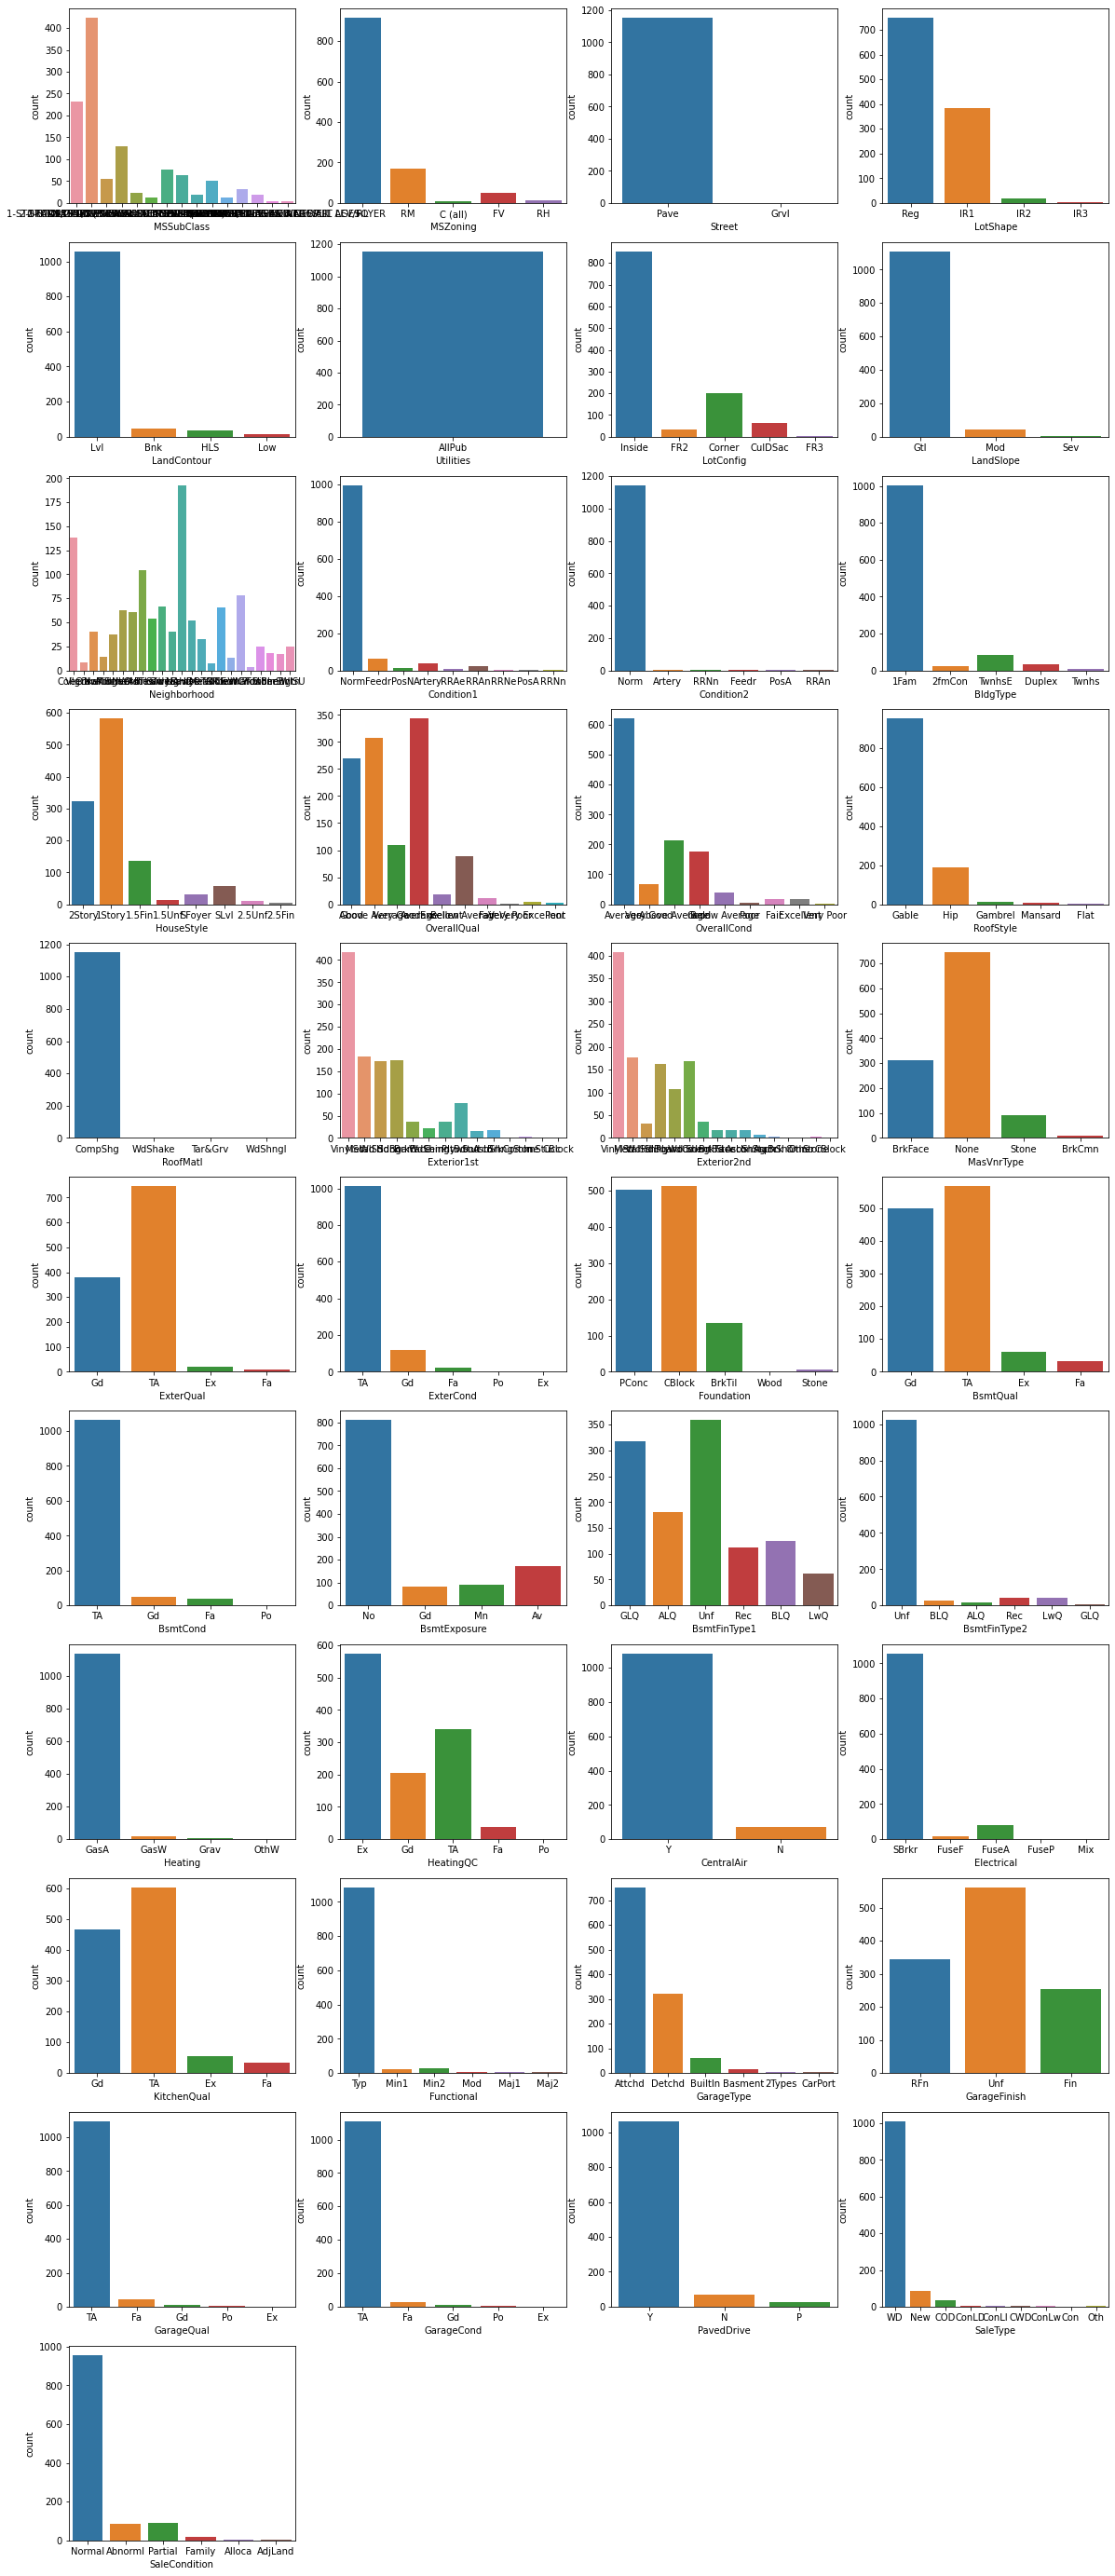

In [1781]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,50))

for i,val in enumerate(categorical_cols):
   
    plt.subplot(11,4,i+1)
    sns.countplot(data = house_df, x= val)
    

## 3. Data Preparation 


#### Data Preparation



In [1782]:
# split into X and y
#SalesPrice is the target
numerical_cols.remove("SalePrice")
final_cols = numerical_cols
final_cols.extend(categorical_cols)
print(final_cols)
X =house_df[final_cols]
y=house_df["SalePrice"]

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


### Creating Dummy variables for categorical variables

In [1783]:
#create dummies with pandas function
dums = pd.get_dummies(X[categorical_cols],drop_first =True)

In [1784]:
dums

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1785]:
#drop the categorical values and concat the dummies
X = X.drop(categorical_cols,axis=1)
X = pd.concat([X,dums],axis=1)

In [1786]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1459
Columns: 231 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(17), uint8(212)
memory usage: 452.6 KB


In [1787]:
#Checking X
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,150,856,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,434,920,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,540,961,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,490,1145,2198,1,...,0,0,0,0,1,0,0,0,1,0


#### Split data into test and train data

In [1788]:
#using train_test_split from sklearn to split the data in the ratio 70:30 for train and test respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,random_state =42)

#### Scale data

In [1789]:
#scaling data with the help of standard scaler
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()

X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

### Ridge Regression

In [1790]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
params={"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge,
                       param_grid=params,
                       cv = 5,
                       scoring= 'neg_mean_absolute_error',
                       return_train_score =True,
                       verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1791]:
best_ridge_model = model_cv.best_estimator_
best_ridge_model

Ridge(alpha=100)

In [1792]:
best_ridge_model.fit(X_train,y_train)
best_ridge_model.coef_

array([ 1.20113690e+03,  4.02693028e+03,  4.10238885e+03,  2.91382402e+03,
        1.44767843e+03,  4.92757491e+03,  8.03763517e+02,  7.52689723e+03,
        1.19143483e+04,  1.62894402e+03,  2.55789303e+03,  2.56873463e+03,
        6.41345255e+02,  2.44826868e+03,  4.87729622e+03,  1.33556573e+03,
        1.75446016e+03,  7.62963612e+01, -2.39012673e+02,  9.49553622e+01,
       -2.53063204e+02,  2.92003950e+02, -2.49376782e+02, -2.85979245e+02,
       -9.58077466e+02, -5.67027254e+01, -2.34504999e+01,  1.79428298e+03,
       -7.72421056e+02, -1.30793445e+03, -2.63045906e+02, -1.05300419e+03,
       -1.28187095e+03,  9.79755427e+02,  2.43603995e+02,  1.71190418e+03,
       -3.13541955e+02,  5.24646435e+02,  8.73821793e+01, -4.27193620e+02,
        8.73703778e+02, -4.95247011e+02, -1.56962825e+03, -4.84965000e+02,
        9.43477588e+02, -1.12288254e+03, -1.24648809e+01, -5.39869305e+02,
        1.43308015e+03, -1.52460247e+03,  1.72734125e+03,  2.82995801e+02,
       -9.63683849e+02,  

In [1793]:
X_train[0]

array([ 1.2371972 ,  0.51539975,  0.72223462,  0.74819963,  2.66249959,
        0.73079231,  0.99147519,  3.24873055,  3.17092049, -0.81165492,
        0.92630308,  1.28076487,  1.3535231 ,  0.67705115,  0.46888087,
       -0.76081185, -0.14632786, -0.85038573, -0.62369824,  2.86237346,
       -0.23400598, -0.73948977, -0.27531413, -0.04978268, -0.15508266,
       -0.11187334, -0.215805  , -0.50231661, -0.14650818, -0.17485208,
       -0.04978268, -0.13270291, -0.22200595, -0.2126491 , -0.12270477,
        0.527296  , -0.42546668,  0.04978268, -0.12270477, -0.04978268,
        0.71564623, -0.17106165, -0.11187334,  0.30535757, -0.23982564,
       -0.17485208, -0.04978268,  0.57877759, -0.18581403, -0.03517988,
       -0.22200595, -0.09993756, -0.39041216, -0.17485208, -0.27270715,
       -0.23692988, -0.17857143, -0.09342473, -0.16719527, -0.43956267,
       -0.03517988, -0.23982564,  8.93867999, -0.18934485, -0.31255936,
       -0.15085094, -0.23400598, -0.22505411, -0.2426943 , -0.13

In [1794]:
y_train_pred_ridge = best_ridge_model.predict(X_train)
y_test_pred_ridge = best_ridge_model.predict(X_test)

In [1795]:
from sklearn.metrics import mean_squared_error,r2_score
print("Root Mean_squared_error for train set is ",np.sqrt(mean_squared_error(y_train,y_train_pred_ridge)))
print("Root Mean_squared_error for test set is ",np.sqrt(mean_squared_error(y_test,y_test_pred_ridge)))
print("R2 score for train set",r2_score(y_train,y_train_pred_ridge))
print("R2 score for test set",r2_score(y_test,y_test_pred_ridge))

Root Mean_squared_error for train set is  14288.02850293662
Root Mean_squared_error for test set is  20814.903365408227
R2 score for train set 0.9433410683972473
R2 score for test set 0.8845678632084709


### Residual Analysis

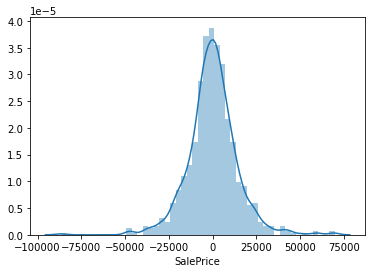

In [1796]:
res = y_train-y_train_pred_ridge
sns.distplot(res)

###### Observation 
The residuals have a normal distribution. Which satisfies one of the assumptions of linear regression models.


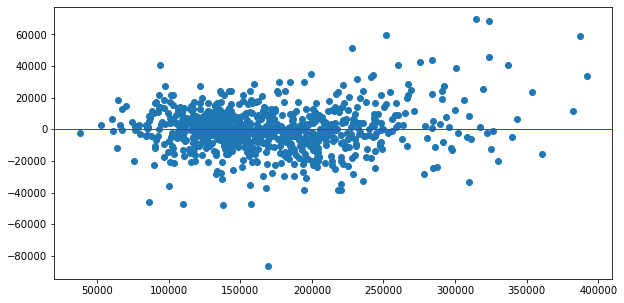

In [1797]:
plt.figure(figsize = (10,5))

plt.axhline(linewidth=1, color='r')
plt.scatter(y_train_pred_ridge,res)

### Lasso Regression

In [1798]:
from sklearn.linear_model import Lasso
lasso = Lasso()

model_lasso_cv = GridSearchCV( estimator = lasso,
                               param_grid=params,
                               cv = 5,
                               scoring= 'neg_mean_absolute_error',
                               return_train_score =True,
                               verbose=1)
model_lasso_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49901608495.146126, tolerance: 238683957.1383354
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46583359872.98576, tolerance: 236222429.71959445
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50934563733.10589, tolerance: 227910668.11892492
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40131782807.03016, tolerance: 222949180.6299407
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24008022737.661427, tolerance: 239838765.43360674
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44060100425.191795, tolerance: 238683957.1383354
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3223412288.24321, tolerance: 227910668.11892492
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22482623740.48782, tolerance: 222949180.6299407
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5716060488.377388, tolerance: 239838765.43360674
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4732039186.301727, tolerance: 238683957.1383354
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1152602466.5947113, tolerance: 222949180.6299407
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 259584072.95503235, tolerance: 239838765.43360674
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1799]:
best_lasso_model = model_lasso_cv.best_estimator_
best_lasso_model

Lasso(alpha=500)

In [1800]:
y_train_pred_lasso = best_lasso_model.predict(X_train)
y_test_pred_lasso = best_lasso_model.predict(X_test)

In [1801]:
from sklearn.metrics import mean_squared_error,r2_score
print("Root Mean_squared_error for train set is ",round(np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)),2))
print("Root Mean_squared_error for test set is ",round(np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)),2))
print("R2 score for train set",r2_score(y_train,y_train_pred_lasso))
print("R2 score for test set",r2_score(y_test,y_test_pred_lasso))

Root Mean_squared_error for train set is  14936.74
Root Mean_squared_error for test set is  19950.61
R2 score for train set 0.9380793322179753
R2 score for test set 0.8939549302754513


### Residual Analysis

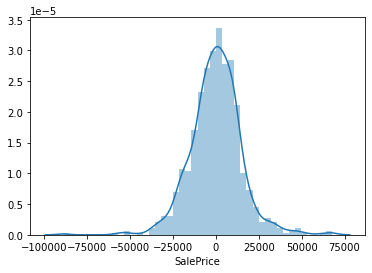

In [1802]:
res = y_train-y_train_pred_lasso
sns.distplot(res)

###### Observation 
The residuals have a normal distribution. Which satisfies one of the assumptions of linear regression models.


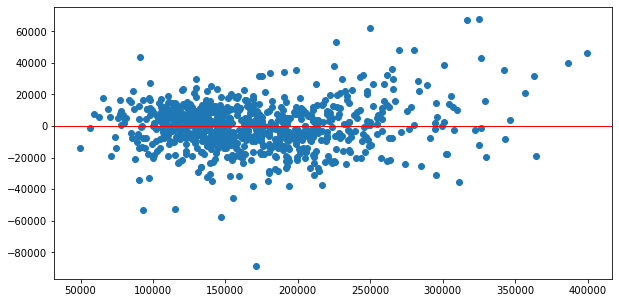

In [1803]:
plt.figure(figsize = (10,5))

plt.axhline(linewidth=1, color='r')
plt.scatter(y_train_pred_lasso,res)